## All Techniques To Handle Missing Values - Feature Engineering Day 2

## Random Sample Imputation

Aim : Random Sample Imputation consist of taking random observation from the dataset and we use this observation to replace the nan values.

When it should be used?
It assumes that the data are missing completely at random (MCAR) similar like mean/median imputation.

In [24]:
import pandas as pd
df = pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [27]:
## creating the random values
df['Age'].dropna().sample()

535    7.0
Name: Age, dtype: float64

In [28]:
df['Age'].dropna().sample(df['Age'].isnull().sum())
## It will changing continuously

695    52.00
477    29.00
488    30.00
373    22.00
518    36.00
       ...  
307    17.00
708    22.00
407     3.00
395    22.00
469     0.75
Name: Age, Length: 177, dtype: float64

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)
## It will not change

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [30]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ## It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) ## Taking the samples equals to the no. of missing values {df[variable].isnull().sum()}
    ## pandas needs to have same index in order to merge the dataset
   
    random_sample.index = df[df[variable].isnull()].index ## Picking up the indexes of feature where Age is missing
    
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [31]:
median = df['Age'].median()

In [32]:
median

28.0

In [33]:
impute_nan(df,'Age',median)

In [34]:
def impute_nan_with_mean(df,variable,mean):
    df[variable+'_mean'] = df[variable].fillna(mean)    

In [35]:
mean = df['Age'].mean()

In [36]:
mean

29.69911764705882

In [37]:
impute_nan_with_mean(df,'Age',mean)

In [38]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_mean
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline

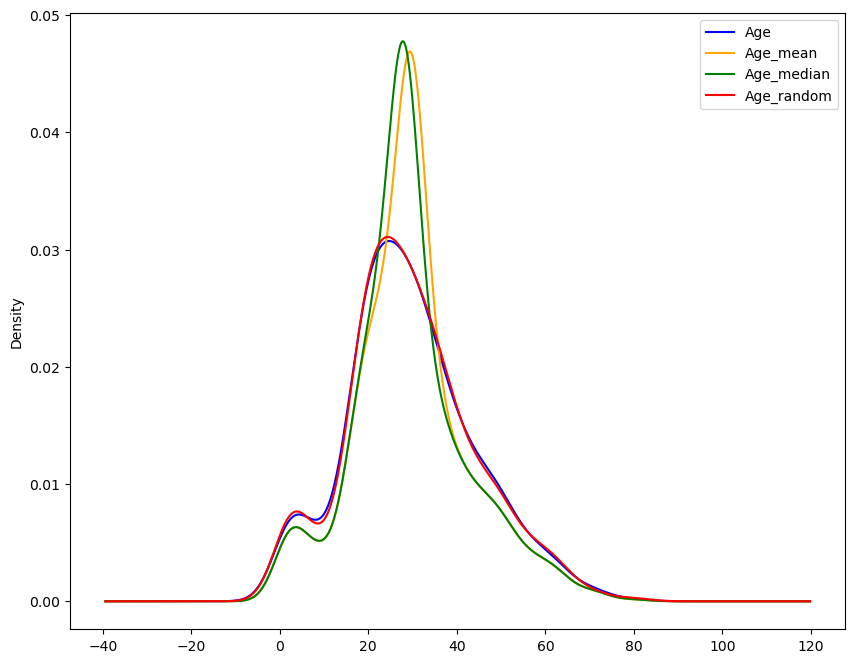

In [40]:
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)

df['Age'].plot(kind='kde',color='blue')
df['Age_mean'].plot(kind='kde',color='orange')
df['Age_median'].plot(kind='kde',color='green')
df['Age_random'].plot(kind='kde',color='red')
_,labels = plt.subplot(1,1,1).get_legend_handles_labels() 
plt.legend(labels, loc='best')
plt.show()


### Advantages and Disadvantages of Random Sample Imputation

#### Advantages
1. Easy to implement
2. There is less distortion in variance

#### Disadvantages
1. In evey situation randomness will not work

But we can try it definitely if it works perfectly in any case.

## Capturing NAN values with a new feature

It works well if the data are not missing complemently at random 

In [41]:
df

,Survived,Age,Fare,Age_median,Age_random,Age_mean
0,0,22.0,7.2500,22.0,22.0,22.000000
1,1,38.0,71.2833,38.0,38.0,38.000000
2,1,26.0,7.9250,26.0,26.0,26.000000
3,1,35.0,53.1000,35.0,35.0,35.000000
4,0,35.0,8.0500,35.0,35.0,35.000000
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.000000
887,1,19.0,30.0000,19.0,19.0,19.000000
888,0,NaN,23.4500,28.0,15.0,29.699118
889,1,26.0,30.0000,26.0,26.0,26.000000


In [42]:
import pandas as pd
df = pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
import numpy as np

In [44]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [46]:
df[df['Age_NAN']==1]

,Survived,Age,Fare,Age_NAN
5,0,NaN,8.4583,1
17,1,NaN,13.0000,1
19,1,NaN,7.2250,1
26,0,NaN,7.2250,1
28,1,NaN,7.8792,1
...,...,...,...,...
859,0,NaN,7.2292,1
863,0,NaN,69.5500,1
868,0,NaN,9.5000,1
878,0,NaN,7.8958,1


In [47]:
df['Age'].median()

28.0

In [48]:
"""
so here we will impute the null values with mean or median anything and on that row 
in Age_NAN feature there is 1 which shows the importance of missing value 
"""

'\nso here we will impute the null values with mean or median anything and on that row \nin Age_NAN feature there is 1 which shows the importance of missing value \n'

In [49]:
df['Age'].fillna(df.Age.median(),inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_28872\2569459057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)


In [50]:
df.head(50)

## In this where 1 it means that value is imputed and if 0 means not imputed 

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages and Disadvantages

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features

If the features are very high in number so it will increase the dimentionality of data and leads to *"Curse of Dimentionality"*.

## End of Distribution Imputation

In [51]:
import pandas as pd
df = pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

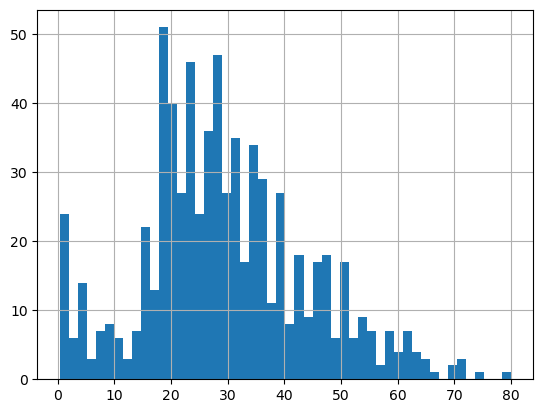

In [52]:
df.Age.hist(bins=50)

In [53]:
## In this we aim to get the importance of the missing values

## and try to use the value from the Far end of the distribution for example close to 70 or 80 in above histogram.

In [54]:
## We take the data outside the 3 std()

In [55]:
df.Age.mean() + 3*df.Age.std()

73.27860964406095

In [56]:
extreme_value = df.Age.mean() + 3*df.Age.std()

In [57]:
extreme_value

73.27860964406095

In [58]:
import seaborn as sns

<Axes: ylabel='Age'>

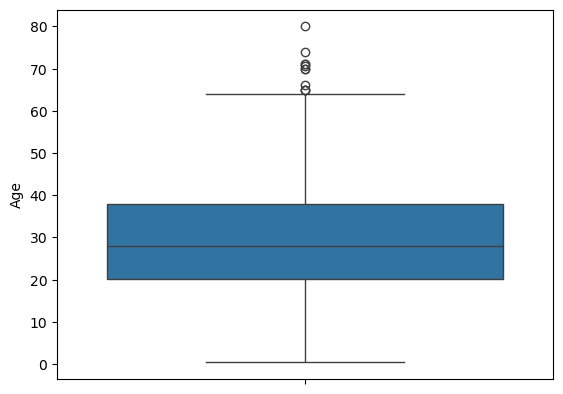

In [59]:
sns.boxplot(df['Age'])

In [60]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True) ## imputed the nan value with median

In [61]:
impute_nan(df,'Age',df.Age.median(),extreme_value)

C:\Users\Yash\AppData\Local\Temp\ipykernel_28872\2375757808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median,inplace=True) ## imputed the nan value with median


In [62]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


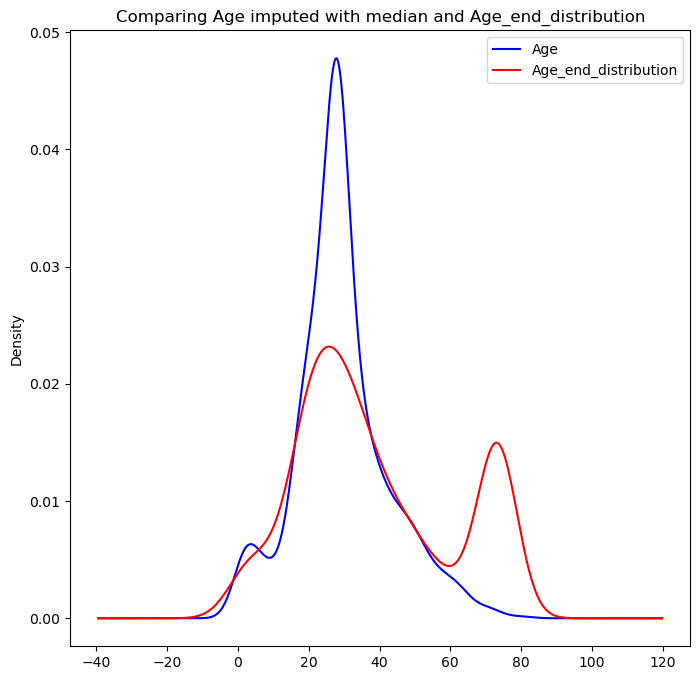

In [72]:
plt.figure(figsize=(8,8))

ax = plt.subplot(1,1,1)

plt.title("Comparing Age imputed with median and Age_end_distribution")

df.Age.plot(kind='kde',color='blue') ## This feature's nan values were imputed with median
df.Age_end_distribution.plot(kind='kde',color='red')

_,labels = ax.get_legend_handles_labels()

plt.legend(labels,loc='best')
plt.show()

<Axes: >

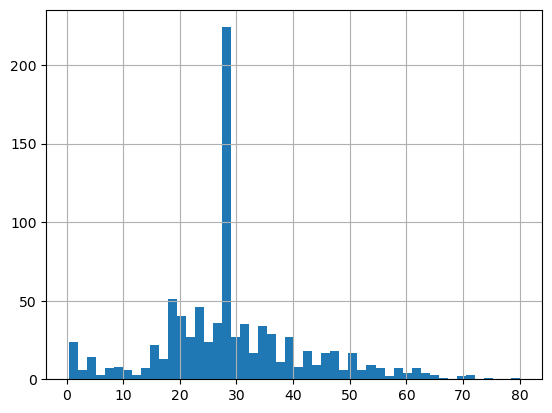

In [ ]:
df['Age'].hist(bins=50) ## because of using median imputation there is a huge distortion

<Axes: >

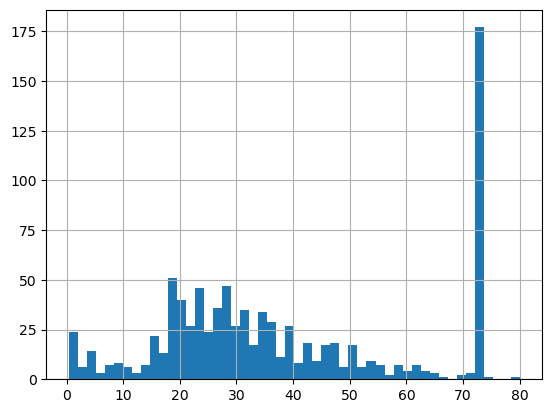

In [74]:
df['Age_end_distribution'].hist(bins=50)

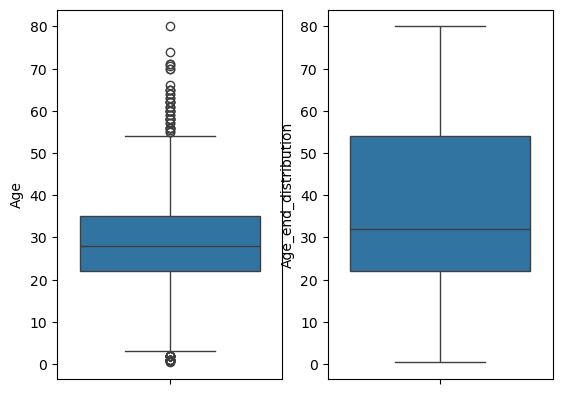

In [82]:
## to check which one is better
plt.subplot(1,2,1)
sns.boxplot(df['Age']) ## imputed null values with median

plt.subplot(1,2,2)
sns.boxplot(df['Age_end_distribution']) ## imputed null values with extreme value (mean + 3*std)

plt.show()

In [83]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


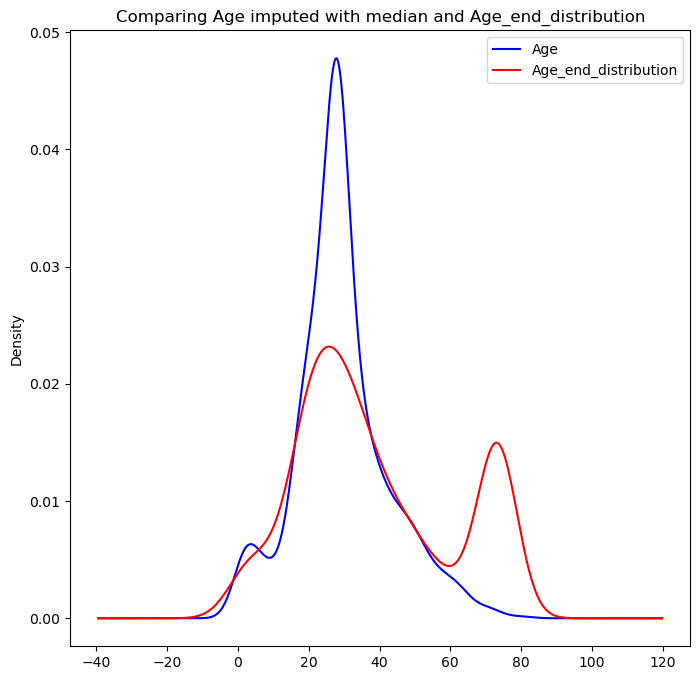

In [84]:
plt.figure(figsize=(8,8))

ax = plt.subplot(1,1,1)

plt.title("Comparing Age imputed with median and Age_end_distribution")

df.Age.plot(kind='kde',color='blue') ## This feature's nan values were imputed with median
df.Age_end_distribution.plot(kind='kde',color='red')

_,labels = ax.get_legend_handles_labels()

plt.legend(labels,loc='best')
plt.show()

In [85]:
import pandas as pd
df = pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [86]:
extreme_value = df.Age.mean() + 3*df.Age.std()
mean = df['Age'].mean()
median = df['Age'].median()

In [87]:
extreme_value,mean,median

(73.27860964406095, 29.69911764705882, 28.0)

In [88]:
def impute_nan(df,variable,mean,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable+'_median'] = df[variable].fillna(median) ## imputed the nan value with median
    df[variable+'_mean'] = df[variable].fillna(mean) ## imputed the nan value with median

In [89]:
impute_nan(df,'Age',mean,median,extreme_value)

In [90]:
df.head()

,Survived,Age,Fare,Age_end_distribution,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


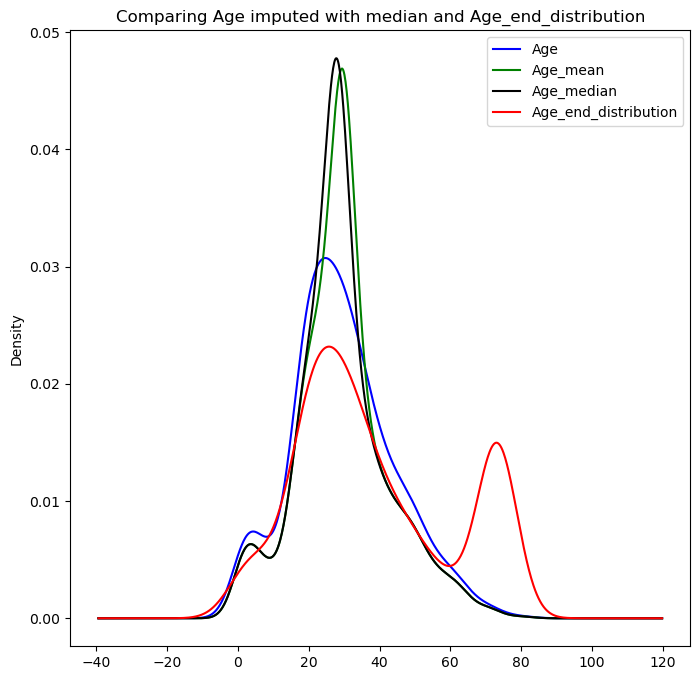

In [92]:
plt.figure(figsize=(8,8))

ax = plt.subplot(1,1,1)

plt.title("Comparing Age imputed with median and Age_end_distribution")

df.Age.plot(kind='kde',color='blue') ## This feature is orginial with nan
df.Age_mean.plot(kind='kde',color='green') ## nan replaced with mean
df.Age_median.plot(kind='kde',color='black') ## nan replaced with median
df.Age_end_distribution.plot(kind='kde',color='red') ## nan replaced with extreme_value

_,labels = ax.get_legend_handles_labels()

plt.legend(labels,loc='best')
plt.show()

### Advantages and Disadvantages

#### Advantages
1. Easy to implement
2. Capture the importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre_processed in a subsequent feature engineering.